In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,matthews_corrcoef,precision_recall_curve,confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from xgboost import XGBClassifier,plot_importance,plot_tree

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


## Chargement des données

In [2]:
df = pd.read_csv("dataset/MSCAD.csv")

## Analyse des données

In [3]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min',Label
0,1518,2,5,110,377,110,0,55.0,77.7817,377,...,1,0,0,0,0,0,0,0,0,Brute_Force
1,5894,4,8,168,4498,168,0,42.0,84.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
2,272,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force
3,2611,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
4,294,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force


In [4]:
df.shape

(128799, 67)

In [5]:
#Nom des colonnes

print("Noms des colonnes :\n",list(df.columns))

Noms des colonnes :
 ["'Flow Duration'", "'Tot Fwd Pkts'", "'Tot Bwd Pkts'", "'TotLen Fwd Pkts'", "'TotLen Bwd Pkts'", "'Fwd Pkt Len Max'", "'Fwd Pkt Len Min'", "'Fwd Pkt Len Mean'", "'Fwd Pkt Len Std'", "'Bwd Pkt Len Max'", "'Bwd Pkt Len Min'", "'Bwd Pkt Len Mean'", "'Bwd Pkt Len Std'", "'Flow Byts/s'", "'Flow Pkts/s'", "'Flow IAT Mean'", "'Flow IAT Std'", "'Flow IAT Max'", "'Flow IAT Min'", "'Fwd IAT Tot'", "'Fwd IAT Mean'", "'Fwd IAT Std'", "'Fwd IAT Max'", "'Fwd IAT Min'", "'Bwd IAT Tot'", "'Bwd IAT Mean'", "'Bwd IAT Std'", "'Bwd IAT Max'", "'Bwd IAT Min'", "'Bwd PSH Flags'", "'Bwd URG Flags'", "'Fwd Header Len'", "'Bwd Header Len'", "'Fwd Pkts/s'", "'Bwd Pkts/s'", "'Pkt Len Min'", "'Pkt Len Max'", "'Pkt Len Mean'", "'Pkt Len Std'", "'Pkt Len Var'", "'FIN Flag Cnt'", "'SYN Flag Cnt'", "'RST Flag Cnt'", "'PSH Flag Cnt'", "'ACK Flag Cnt'", "'URG Flag Cnt'", "'CWE Flag Count'", "'ECE Flag Cnt'", "'Down/Up Ratio'", "'Pkt Size Avg'", "'Fwd Seg Size Avg'", "'Bwd Seg Size Avg'", "'Subflow

In [6]:
print(df.Label.unique())

['Brute_Force' 'HTTP_DDoS' 'ICMP_Flood' 'Normal' 'Port_Scan' 'Web_Crwling']


In [7]:
#How many entries are there in malicious traffic? In benign traffic?

print("Benign traffic : ", len(df[df.Label=='Normal']))
print("Malicious traffic : ", len(df[df.Label!='Normal']))

Benign traffic :  28502
Malicious traffic :  100297


In [8]:
df["Label"].value_counts()

Brute_Force    88502
Normal         28502
Port_Scan      11081
HTTP_DDoS        641
ICMP_Flood        45
Web_Crwling       28
Name: Label, dtype: int64

In [9]:
print(list(df.select_dtypes(include=['O'])))

['Label']


## encodage des paramètres catégoriels

In [10]:
X = df.copy()
Y = df["Label"]
Y.to_frame()
X = X.drop(columns = ['Label'])
col = list(df.select_dtypes(include=['O']))
col = col[:-1]
enc = OneHotEncoder(handle_unknown='ignore')
transformed = pd.DataFrame(enc.fit_transform(X[col]).toarray())
X = X.join(transformed)
X = X.drop(col,axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.3, shuffle = True)

## Application de XGBClassifier

The precision, the recall, and the accuracy can be found in the following classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61952
           1       0.97      0.95      0.96       456
           2       0.95      0.70      0.81        30
           3       1.00      1.00      1.00     19939
           4       1.00      0.99      0.99      7768
           5       0.20      0.20      0.20        15

    accuracy                           1.00     90160
   macro avg       0.85      0.81      0.83     90160
weighted avg       1.00      1.00      1.00     90160

The balanced accuracy : 0.8066516885880167
The Matthews Correlation Coefficient : 0.9959995058306652


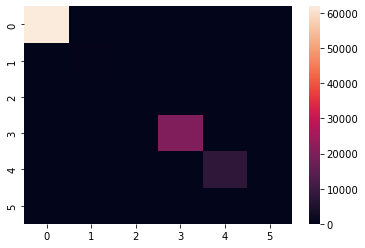

In [12]:
le = preprocessing.LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train_transformed)

y_predictions_transformed = model_xgb.predict(X_test)

y_test_t = le.transform(y_test)
conf_matrix = confusion_matrix(y_test_t, y_predictions_transformed)
sn.heatmap(conf_matrix)

print("The precision, the recall, and the accuracy can be found in the following classification report :")
print(classification_report(y_test_t, y_predictions_transformed))

print("The balanced accuracy : " + str(balanced_accuracy_score(y_test_t, y_predictions_transformed)))
print("The Matthews Correlation Coefficient : " + str(matthews_corrcoef(y_test_t,y_predictions_transformed)))

## PCA

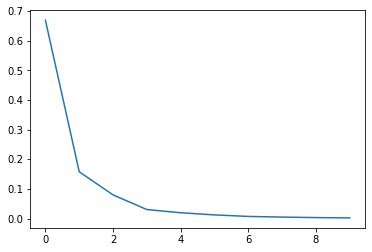

In [13]:
pca = PCA(n_components=10)
pca.fit(X)

plt.plot(range(0,10),pca.explained_variance_ratio_)

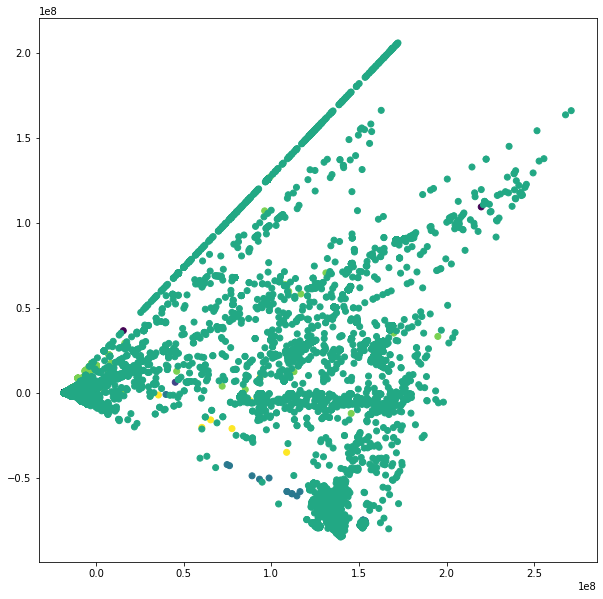

In [14]:
pca = PCA(n_components=2)
pca.fit(X)
coeff=pca.components_

Xt=pca.transform(X)

plt.figure(figsize=(10,10))
plt.scatter(Xt[:,0],Xt[:,1],c=le.fit_transform(Y))

Il est impossible de différencier les différents types (principalement du brute force et du bénin).

## DecisionTreeClassifier

              precision    recall  f1-score   support

 Brute_Force       1.00      1.00      1.00     61952
   HTTP_DDoS       0.92      0.95      0.93       456
  ICMP_Flood       0.51      0.70      0.59        30
      Normal       0.99      0.99      0.99     19939
   Port_Scan       0.99      0.98      0.99      7768
 Web_Crwling       0.10      0.20      0.14        15

    accuracy                           1.00     90160
   macro avg       0.75      0.80      0.77     90160
weighted avg       1.00      1.00      1.00     90160



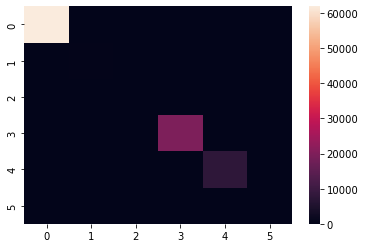

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_cart = DecisionTreeClassifier()
model_cart.fit(X_train, y_train)
y_predict = model_cart.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predict)
sn.heatmap(conf_matrix)
print(classification_report(y_test, y_predict))

In [17]:
print("Balanced accuracy : " + str(balanced_accuracy_score(y_test, y_predict)))
print("Matthews Correlation Coefficient : " + str(matthews_corrcoef(y_test,y_predict)))

Balanced accuracy : 0.8041444323689864
Matthews Correlation Coefficient : 0.9920005295020196


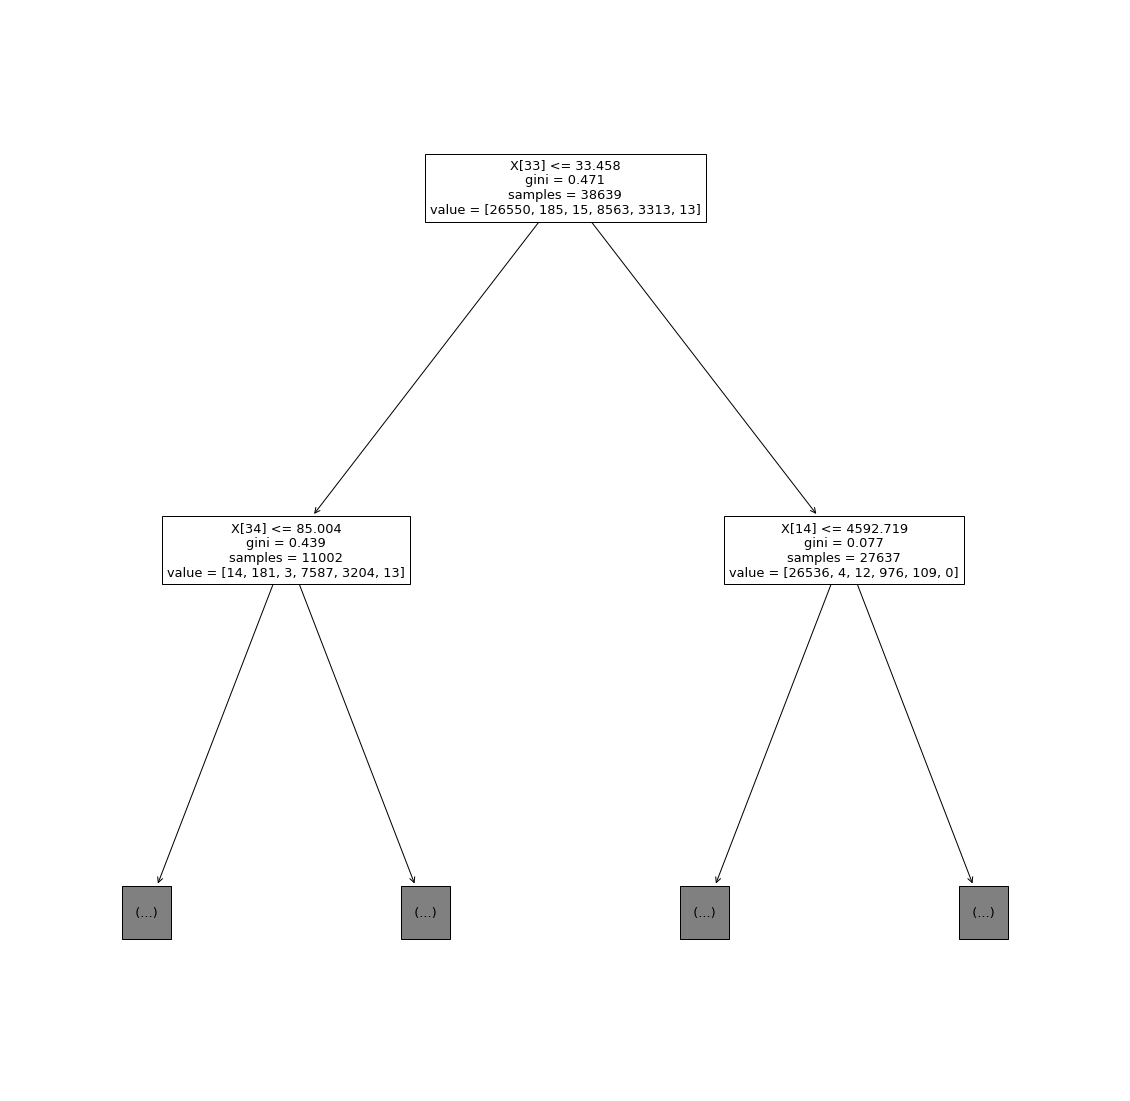

In [18]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(model_cart,max_depth=1)

## SVM

/home/boyer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/boyer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Brute_Force       0.83      1.00      0.91     61952
   HTTP_DDoS       0.00      0.00      0.00       456
  ICMP_Flood       0.88      0.23      0.37        30
      Normal       0.97      0.76      0.85     19939
   Port_Scan       0.88      0.01      0.02      7768
 Web_Crwling       0.00      0.00      0.00        15

    accuracy                           0.86     90160
   macro avg       0.59      0.33      0.36     90160
weighted avg       0.86      0.86      0.81     90160



/home/boyer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


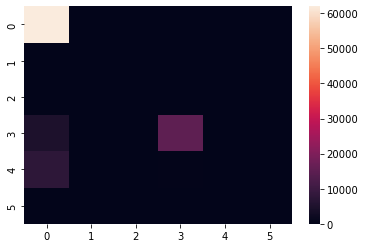

In [19]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predict)
sn.heatmap(conf_matrix)
print(classification_report(y_test, y_predict))

In [20]:
print("Balanced accuracy : " + str(balanced_accuracy_score(y_test, y_predict)))
print("Matthews Correlation Coefficient : " + str(matthews_corrcoef(y_test,y_predict)))

Balanced accuracy : 0.3340263615426653
Matthews Correlation Coefficient : 0.6802635679689817


## Références

MSCAD:

Almseidin, M., Al-Sawwa, J. and Alkasassbeh, M. (2022) “Generating a benchmark cyber multi-step attacks dataset for intrusion detection,” Journal of Intelligent &amp; Fuzzy Systems, 43(3), pp. 3679–3694. Available at: https://doi.org/10.3233/jifs-213247. 

PWNJUTSU

Aimad Berady, Mathieu Jaume, Valérie Viet Triem Tong, Gilles Guette. PWNJUTSU: A dataset and
a semantics-driven approach to retrace attack campaigns. IEEE Transactions on Network and Service
Management, IEEE, In press, Special Issue on Recent Advances in Network Security Management,
pp.1-13. 10.1109/TNSM.2022.3183476. hal-03694719

Pour la suite, possibilité de LSTM:

Sai Charan, P.V., Gireesh Kumar, T. and Mohan Anand, P. (2019) “Advance persistent threat detection using long short term memory (LSTM) neural networks,” Emerging Technologies in Computer Engineering: Microservices in Big Data Analytics, pp. 45–54. Available at: https://doi.org/10.1007/978-981-13-8300-7_5. 